In [ ]:
import numpy as np
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import io
from sklearn.tree import DecisionTreeClassifier 
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from IPython.display import Image
from sklearn.tree import export_graphviz
from sklearn.model_selection import cross_val_score
from tqdm import tqdm_notebook as tqdm
from sklearn.externals.six import StringIO
import pydotplus
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px 
# from cyberpandas import IPArray, to_ipaddress
import ipaddress
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [ ]:
# pip install cyberpandas

# **DATA UPLOADING AND CLEANING**

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
from zipfile import ZipFile
filename="/content/drive/My Drive/MasterSoft/logbackups.zip"
with ZipFile(filename,"r") as zp:
  zp.extractall()
  print("Done") 


Done


In [ ]:
path = '/content/u_ex200701.log'
data = pd.read_csv(path , sep='\s+', skiprows=3, encoding='latin-1', error_bad_lines = False)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (8,16,17,18,19,20,21,22) have mixed types.Specify dtype option on import or set low_memory=False.



In [ ]:
lastHead=data.columns[-1]
data.drop([lastHead], axis=1,inplace=True)
newHead=data.columns[1:]
newHead=np.array(newHead)
newHead = np.append(newHead,lastHead)
data.columns=newHead

In [ ]:
data.dropna(inplace =True)
data = data[data['c-ip'] != "cs-username"] #extra header
data = data[data["cs-host"] != "localhost"] #localhost waste data
columns=['s-sitename','s-computername', 's-ip', 's-port', 'cs-version','cs-host','sc-substatus','sc-win32-status']
data = data.drop(columns,axis=1)
data = data.reset_index(drop=True)

In [ ]:
data

,date,time,cs-method,cs-uri-stem,cs-uri-query,cs-username,c-ip,cs(User-Agent),cs(Cookie),cs(Referer),sc-status,sc-bytes,cs-bytes,time-taken
0,2020-07-01,00:00:00,GET,/EKAP/Ortak/YeniIhaleAramaData.ashx,ES=&metot=isLogin,-,159.69.163.150,M-EKAP/1.9.4.1+(Android+5.1.1),ASP.NET_SessionId=has5g0gjfc5uzyl0uw4o1ky1;+BI...,-,200,387,317,7
1,2020-07-01,00:00:00,GET,/EKAP/Ortak/YeniIhaleAramaData.ashx,pageIndex=9&tabId=0ceef113-05a7-4476-f91c-6411...,-,159.69.163.150,M-EKAP/1.9.4.1+(Android+5.1.1),ASP.NET_SessionId=has5g0gjfc5uzyl0uw4o1ky1;+BI...,-,200,42331,470,595
2,2020-07-01,00:00:01,GET,/EKAP/Ortak/YeniIhaleAramaData.ashx,ES=&metot=isLogin,-,159.69.163.150,M-EKAP/1.9.4.1+(Android+5.1.1),ASP.NET_SessionId=has5g0gjfc5uzyl0uw4o1ky1;+BI...,-,200,387,317,4
3,2020-07-01,00:00:01,GET,/EKAP/Ortak/YeniIhaleAramaData.ashx,pageIndex=10&tabId=0ceef113-05a7-4476-f91c-641...,-,159.69.163.150,M-EKAP/1.9.4.1+(Android+5.1.1),ASP.NET_SessionId=has5g0gjfc5uzyl0uw4o1ky1;+BI...,-,200,424,471,526
4,2020-07-01,00:00:01,GET,/EKAP/Ortak/YeniIhaleAramaData.ashx,ES=&metot=isLogin,-,159.69.163.150,M-EKAP/1.9.4.1+(Android+5.1.1),ASP.NET_SessionId=has5g0gjfc5uzyl0uw4o1ky1;+BI...,-,200,387,317,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2681852,2020-07-01,23:59:58,GET,/EKAP/Ortak/BirBakistaIhale.aspx,IdareId=07aba124ac6f130c39fb59c55707f0a1b1ae52...,-,161.9.144.37,Mozilla/5.0+(Windows+NT+6.1;+Win64;+x64)+Apple...,BIGipServerGS-EKAP-WEB=rd2o0000000000000000000...,https://ekap.kik.gov.tr/EKAP/Ortak/BirBakistaI...,200,8206,1032,489
2681853,2020-07-01,23:59:58,GET,/EKAP/Ortak/BirBakistaIhale.aspx,IdareId=ae0e6b6b0f33c5c5213bca13fa1d636843451e...,-,88.255.228.26,Mozilla/5.0+(Windows+NT+10.0;+Win64;+x64)+Appl...,linkYardimPortal2=1;+lbtnDuzenle201409=1;+css=...,https://ekap.kik.gov.tr/EKAP/Ortak/BirBakistaI...,200,9744,1220,70
2681854,2020-07-01,23:59:58,GET,/EKAP/Default.aspx,-,-,10.110.11.32,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,-,-,200,101190,143,28
2681855,2020-07-01,23:59:59,GET,/EKAP/Ortak/BirBakistaIhale.aspx,IdareId=0ce336d8471edf0c33b4454d7bad214557b11d...,-,161.9.144.37,Mozilla/5.0+(Windows+NT+6.1;+Win64;+x64)+Apple...,BIGipServerGS-EKAP-WEB=rd2o0000000000000000000...,https://ekap.kik.gov.tr/EKAP/Ortak/BirBakistaI...,200,8121,1032,578


# **ONLY SELECTING THE ROW CONTAIN ".aspx"**


In [ ]:
dataASPX = data[data["cs-uri-stem"].str.contains(".aspx")]

In [ ]:
dataASPX

,date,time,cs-method,cs-uri-stem,cs-uri-query,cs-username,c-ip,cs(User-Agent),cs(Cookie),cs(Referer),sc-status,sc-bytes,cs-bytes,time-taken
5,2020-07-01,00:00:01,GET,/EKAP/Ortak/BirBakistaIhale.aspx,IdareId=97b19497907e190b6569d3a318d5d368f66c86...,17302892776,88.252.13.173,Mozilla/5.0+(Windows+NT+10.0;+Win64;+x64)+Appl...,linkYardimPortal2=1;+_ga=GA1.3.1764455409.1583...,https://ekap.kik.gov.tr/EKAP/Ortak/BirBakistaI...,200,9788,1443,122
6,2020-07-01,00:00:02,GET,/EKAP/Ortak/BirBakistaIhale.aspx,IdareId=508d698f7f693d94de819da435e28da455d46a...,-,46.154.132.188,Mozilla/5.0+(Linux;+Android+8.0.0;+SAMSUNG+SM-...,linkYardimPortal2=1;+ASP.NET_SessionId=uq1z0yd...,https://ekap.kik.gov.tr/EKAP/Ortak/IhaleArama/...,200,9656,862,152
9,2020-07-01,00:00:04,POST,/EKAP/Istekli/KatilimYeterlik.aspx,ikn=2020%2f311296,36199271570,88.231.141.199,Mozilla/5.0+(Windows+NT+6.1;+Win64;+x64)+Apple...,linkYardimPortal2=1;+BIGipServerGS-EKAP-WEB=rd...,https://ekap.kik.gov.tr/EKAP/Istekli/KatilimYe...,200,23835,16096,194
12,2020-07-01,00:00:05,GET,/EKAP/Ortak/BirBakistaIhale.aspx,IdareId=bb79e8d2db6cae8a88c30c11c84c360554420c...,17302892776,88.252.13.173,Mozilla/5.0+(Windows+NT+10.0;+Win64;+x64)+Appl...,linkYardimPortal2=1;+_ga=GA1.3.1764455409.1583...,https://ekap.kik.gov.tr/EKAP/Ortak/BirBakistaI...,200,9508,1443,107
15,2020-07-01,00:00:05,GET,/EKAP/Ortak/Feeds/EkapFeedRss.aspx,param=f29f0035e2ce136e0b7a747f7fdf6c209e5b5b1c...,-,185.68.222.5,Microsoft+Office/12.0+(Windows+NT+6.2;+Microso...,BIGipServerGS-EKAP-WEB=rd2o0000000000000000000...,-,200,11627,524,21088
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2681852,2020-07-01,23:59:58,GET,/EKAP/Ortak/BirBakistaIhale.aspx,IdareId=07aba124ac6f130c39fb59c55707f0a1b1ae52...,-,161.9.144.37,Mozilla/5.0+(Windows+NT+6.1;+Win64;+x64)+Apple...,BIGipServerGS-EKAP-WEB=rd2o0000000000000000000...,https://ekap.kik.gov.tr/EKAP/Ortak/BirBakistaI...,200,8206,1032,489
2681853,2020-07-01,23:59:58,GET,/EKAP/Ortak/BirBakistaIhale.aspx,IdareId=ae0e6b6b0f33c5c5213bca13fa1d636843451e...,-,88.255.228.26,Mozilla/5.0+(Windows+NT+10.0;+Win64;+x64)+Appl...,linkYardimPortal2=1;+lbtnDuzenle201409=1;+css=...,https://ekap.kik.gov.tr/EKAP/Ortak/BirBakistaI...,200,9744,1220,70
2681854,2020-07-01,23:59:58,GET,/EKAP/Default.aspx,-,-,10.110.11.32,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,-,-,200,101190,143,28
2681855,2020-07-01,23:59:59,GET,/EKAP/Ortak/BirBakistaIhale.aspx,IdareId=0ce336d8471edf0c33b4454d7bad214557b11d...,-,161.9.144.37,Mozilla/5.0+(Windows+NT+6.1;+Win64;+x64)+Apple...,BIGipServerGS-EKAP-WEB=rd2o0000000000000000000...,https://ekap.kik.gov.tr/EKAP/Ortak/BirBakistaI...,200,8121,1032,578


In [ ]:
dataASPX["cs-uri-stem"].value_counts()

/EKAP/Default.aspx                                                            85105
/EKAP/Ortak/BirBakistaIhale.aspx                                              81116
/EKAP/Teklif/IhaleDokumanDownloadEImzaliNet.aspx/CheckDokumanIndirmeStatus    50242
/EKAP/SystemLogin.aspx                                                        50002
/EKAP/Idare/Sihirbaz/DokumanHazirlama.aspx                                    47412
                                                                              ...  
/common/admin/Jobs2/Telerik.Web.UI.DialogHandler.aspx                             1
/DesktopModules/Admin/RadEditorProvider/DialogHandler.aspx                        1
/EKAP/Ortak/IhaleArama.aspx                                                       1
/EKAP/common/admin/Jobs2/Telerik.Web.UI.DialogHandler.aspx                        1
/EKAP/Yasaklilik/YasakliSorgu.aspx)+adresinden                                    1
Name: cs-uri-stem, Length: 458, dtype: int64

# **SELECTING "/EKAP/Ortak/BirBakistaIhale.aspx"**

In [ ]:
dataBirBakistaIhale = dataASPX[dataASPX["cs-uri-stem"]=="/EKAP/Ortak/BirBakistaIhale.aspx"]
dataBirBakistaIhale = dataBirBakistaIhale.reset_index(drop=True)

In [ ]:
dataBirBakistaIhale

,date,time,cs-method,cs-uri-stem,cs-uri-query,cs-username,c-ip,cs(User-Agent),cs(Cookie),cs(Referer),sc-status,sc-bytes,cs-bytes,time-taken
0,2020-07-01,00:00:01,GET,/EKAP/Ortak/BirBakistaIhale.aspx,IdareId=97b19497907e190b6569d3a318d5d368f66c86...,17302892776,88.252.13.173,Mozilla/5.0+(Windows+NT+10.0;+Win64;+x64)+Appl...,linkYardimPortal2=1;+_ga=GA1.3.1764455409.1583...,https://ekap.kik.gov.tr/EKAP/Ortak/BirBakistaI...,200,9788,1443,122
1,2020-07-01,00:00:02,GET,/EKAP/Ortak/BirBakistaIhale.aspx,IdareId=508d698f7f693d94de819da435e28da455d46a...,-,46.154.132.188,Mozilla/5.0+(Linux;+Android+8.0.0;+SAMSUNG+SM-...,linkYardimPortal2=1;+ASP.NET_SessionId=uq1z0yd...,https://ekap.kik.gov.tr/EKAP/Ortak/IhaleArama/...,200,9656,862,152
2,2020-07-01,00:00:05,GET,/EKAP/Ortak/BirBakistaIhale.aspx,IdareId=bb79e8d2db6cae8a88c30c11c84c360554420c...,17302892776,88.252.13.173,Mozilla/5.0+(Windows+NT+10.0;+Win64;+x64)+Appl...,linkYardimPortal2=1;+_ga=GA1.3.1764455409.1583...,https://ekap.kik.gov.tr/EKAP/Ortak/BirBakistaI...,200,9508,1443,107
3,2020-07-01,00:00:11,GET,/EKAP/Ortak/BirBakistaIhale.aspx,IdareId=9d38b0f795738d4397f5400440bbff259045fb...,-,46.154.132.188,Mozilla/5.0+(Linux;+Android+8.0.0;+SAMSUNG+SM-...,linkYardimPortal2=1;+ASP.NET_SessionId=uq1z0yd...,https://ekap.kik.gov.tr/EKAP/Ortak/BirBakistaI...,200,10115,1033,97
4,2020-07-01,00:00:13,GET,/EKAP/Ortak/BirBakistaIhale.aspx,IdareId=0409bf8284375665b1289d57f40e72906d1788...,-,46.154.132.188,Mozilla/5.0+(Linux;+Android+8.0.0;+SAMSUNG+SM-...,linkYardimPortal2=1;+ASP.NET_SessionId=uq1z0yd...,https://ekap.kik.gov.tr/EKAP/Ortak/IhaleArama/...,200,9544,862,156
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81111,2020-07-01,23:59:58,GET,/EKAP/Ortak/BirBakistaIhale.aspx,IdareId=1bd020d59d6c2b0ef14eeb7edb963cf9d851c5...,26458708572,176.42.110.141,Mozilla/5.0+(Windows+NT+6.1)+AppleWebKit/537.3...,linkYardimPortal2=1;+css=%2FEKAP%2FApp_Themes%...,https://ekap.kik.gov.tr/EKAP/Ortak/BirBakistaI...,200,9678,1426,131
81112,2020-07-01,23:59:58,GET,/EKAP/Ortak/BirBakistaIhale.aspx,IdareId=aecbdbf57790a8dfd5d0caebdc7e4a3e25213b...,-,46.155.245.35,Mozilla/5.0+(iPhone;+CPU+iPhone+OS+13_5_1+like...,browserDetection=browserDetection;+linkYardimP...,https://ekap.kik.gov.tr/EKAP/Ortak/IhaleArama/...,200,9615,767,176
81113,2020-07-01,23:59:58,GET,/EKAP/Ortak/BirBakistaIhale.aspx,IdareId=07aba124ac6f130c39fb59c55707f0a1b1ae52...,-,161.9.144.37,Mozilla/5.0+(Windows+NT+6.1;+Win64;+x64)+Apple...,BIGipServerGS-EKAP-WEB=rd2o0000000000000000000...,https://ekap.kik.gov.tr/EKAP/Ortak/BirBakistaI...,200,8206,1032,489
81114,2020-07-01,23:59:58,GET,/EKAP/Ortak/BirBakistaIhale.aspx,IdareId=ae0e6b6b0f33c5c5213bca13fa1d636843451e...,-,88.255.228.26,Mozilla/5.0+(Windows+NT+10.0;+Win64;+x64)+Appl...,linkYardimPortal2=1;+lbtnDuzenle201409=1;+css=...,https://ekap.kik.gov.tr/EKAP/Ortak/BirBakistaI...,200,9744,1220,70


# **SELECTING "/EKAP/Default.aspx"**

In [ ]:
dataASPX[dataASPX['cs-uri-stem']=='/ekap/Default.aspx']

,date,time,cs-method,cs-uri-stem,cs-uri-query,cs-username,c-ip,cs(User-Agent),cs(Cookie),cs(Referer),sc-status,sc-bytes,cs-bytes,time-taken
15894,2020-07-01,01:57:26,GET,/ekap/Default.aspx,-,-,157.55.39.70,Mozilla/5.0+(compatible;+bingbot/2.0;++http://...,-,-,200,26599,287,43
18183,2020-07-01,02:28:00,GET,/ekap/Default.aspx,-,-,157.55.39.70,Mozilla/5.0+(compatible;+bingbot/2.0;++http://...,-,-,200,26608,287,48
21710,2020-07-01,03:09:51,GET,/ekap/Default.aspx,-,-,157.55.39.70,Mozilla/5.0+(compatible;+bingbot/2.0;++http://...,-,-,200,26625,287,32
23120,2020-07-01,03:28:35,GET,/ekap/Default.aspx,-,-,157.55.39.70,Mozilla/5.0+(compatible;+bingbot/2.0;++http://...,-,-,200,26611,287,45
24278,2020-07-01,03:39:15,GET,/ekap/Default.aspx,-,-,157.55.39.70,Mozilla/5.0+(compatible;+bingbot/2.0;++http://...,-,-,200,26618,287,45
54140,2020-07-01,05:07:21,GET,/ekap/Default.aspx,-,-,157.55.39.70,Mozilla/5.0+(compatible;+bingbot/2.0;++http://...,-,-,200,26613,287,43
69621,2020-07-01,05:19:29,GET,/ekap/Default.aspx,-,-,46.2.209.69,Mozilla/5.0+(Windows+NT+10.0;+Win64;+x64)+Appl...,-,-,200,26607,388,58
70064,2020-07-01,05:19:39,POST,/ekap/Default.aspx,-,-,46.2.209.69,Mozilla/5.0+(Windows+NT+10.0;+Win64;+x64)+Appl...,ASP.NET_SessionId=zt33ydu4rjvfasb04nx3z0ry;+BI...,https://ekap.kik.gov.tr/ekap/Default.aspx,302,847,1965,104
81997,2020-07-01,05:27:08,GET,/ekap/Default.aspx,-,-,31.223.33.222,Mozilla/5.0+(Windows+NT+6.1;+)+AppleWebKit/537...,linkYardimPortal2=1;+css=%2FEKAP%2FApp_Themes%...,-,200,26616,683,31
82051,2020-07-01,05:27:10,POST,/ekap/Default.aspx,-,-,31.223.33.222,Mozilla/5.0+(Windows+NT+6.1;+)+AppleWebKit/537...,linkYardimPortal2=1;+css=%2FEKAP%2FApp_Themes%...,https://ekap.kik.gov.tr/ekap/Default.aspx,302,847,2266,112


In [ ]:
dataDefault = dataASPX[dataASPX["cs-uri-stem"]=="/EKAP/Default.aspx"]
dataDefault = dataDefault.reset_index(drop=True)

In [ ]:
dataDefault

,date,time,cs-method,cs-uri-stem,cs-uri-query,cs-username,c-ip,cs(User-Agent),cs(Cookie),cs(Referer),sc-status,sc-bytes,cs-bytes,time-taken
0,2020-07-01,00:00:44,GET,/EKAP/Default.aspx,-,36199271570,88.231.141.199,Mozilla/5.0+(Windows+NT+6.1;+Win64;+x64)+Apple...,linkYardimPortal2=1;+BIGipServerGS-EKAP-WEB=rd...,https://ekap.kik.gov.tr/EKAP/Istekli/KatilimYe...,200,35920,1085,111
1,2020-07-01,00:00:59,GET,/EKAP/Default.aspx,-,-,10.110.11.31,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,-,-,200,99801,143,29
2,2020-07-01,00:01:01,GET,/EKAP/Default.aspx,ReturnUrl=%2fEKAP%2fwplogin%2f,-,185.67.33.210,Mozilla/5.0+(X11;+Linux+x86_64;+rv:75.0)+Gecko...,BIGipServerGS-EKAP-WEB=rd2o0000000000000000000...,-,200,26641,312,33
3,2020-07-01,00:01:07,GET,/EKAP/Default.aspx,-,-,10.120.45.222,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,-,-,200,99801,146,27
4,2020-07-01,00:01:07,GET,/EKAP/Default.aspx,-,11744523502,31.155.242.69,Mozilla/5.0+(Windows+NT+10.0;+Win64;+x64)+Appl...,linkYardimPortal2=1;+css=%2FEKAP%2FApp_Themes%...,https://ekap.kik.gov.tr/EKAP/SystemLogin.aspx,200,35596,1116,209
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85100,2020-07-01,23:58:16,GET,/EKAP/Default.aspx,ReturnUrl=%2fEKAP%2fIsDeneyim2%2fIsDeneyimBasv...,-,188.3.238.19,Mozilla/5.0+(iPhone;+CPU+iPhone+OS+13_5_1+like...,BIGipServerGS-EKAP-WEB=rd2o0000000000000000000...,https://ekap.kik.gov.tr/EKAP/IsDeneyim2/IsDene...,200,26759,626,33
85101,2020-07-01,23:58:31,GET,/EKAP/Default.aspx,ReturnUrl=%2fEKAP%2f/,-,185.67.33.247,Mozilla/5.0+(Windows+NT+10.0;+Win64;+x64)+Appl...,-,https://www.google.com/,200,26735,434,33
85102,2020-07-01,23:58:59,GET,/EKAP/Default.aspx,-,-,10.110.11.31,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,-,-,200,101190,143,75
85103,2020-07-01,23:59:07,GET,/EKAP/Default.aspx,-,-,10.120.45.222,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,-,-,200,101190,146,29


# **SELECTING SEVERAL FEATURES**


In [ ]:
columns = ["cs-method","sc-status","sc-bytes","cs-bytes","time-taken","cs-username"]

In [ ]:
dataBirBakistaIhaleSelected = dataBirBakistaIhale[columns]
dataDefaultSelected = dataDefault[columns]

In [ ]:
dataBirBakistaIhaleSelected

,cs-method,sc-status,sc-bytes,cs-bytes,time-taken,cs-username
0,GET,200,9788,1443,122,17302892776
1,GET,200,9656,862,152,-
2,GET,200,9508,1443,107,17302892776
3,GET,200,10115,1033,97,-
4,GET,200,9544,862,156,-
...,...,...,...,...,...,...
81111,GET,200,9678,1426,131,26458708572
81112,GET,200,9615,767,176,-
81113,GET,200,8206,1032,489,-
81114,GET,200,9744,1220,70,-


In [ ]:
dataDefaultSelected

,cs-method,sc-status,sc-bytes,cs-bytes,time-taken,cs-username
0,GET,200,35920,1085,111,36199271570
1,GET,200,99801,143,29,-
2,GET,200,26641,312,33,-
3,GET,200,99801,146,27,-
4,GET,200,35596,1116,209,11744523502
...,...,...,...,...,...,...
85100,GET,200,26759,626,33,-
85101,GET,200,26735,434,33,-
85102,GET,200,101190,143,75,-
85103,GET,200,101190,146,29,-


# **CONVERTING TO SUITABLE DATA TYPE**

In [ ]:
dataDefaultSelected["cs-username"].value_counts()

-              48616
11060353166      351
13349277972      285
20065984138      170
24041022128      127
               ...  
32188984384        1
11977217308        1
11843354076        1
30037912410        1
19135627846        1
Name: cs-username, Length: 10569, dtype: int64

In [ ]:
dataBirBakistaIhaleSelected["cs-username"].value_counts()

-              67402
26458708572     2446
16883908340      368
36925552096      327
31438587290      208
               ...  
30710038888        1
11873082550        1
66901098560        1
47677234482        1
10282176850        1
Name: cs-username, Length: 1104, dtype: int64

In [ ]:
dataBirBakistaIhaleSelected.loc[dataBirBakistaIhaleSelected['cs-username'] == "-", 'cs-username'] = "1" # User name anonymous
dataDefaultSelected.loc[dataDefaultSelected['cs-username'] == "-", 'cs-username'] = "1" # User name anonymous

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
dataBirBakistaIhaleSelected["cs-username"].value_counts()

1              67402
26458708572     2446
16883908340      368
36925552096      327
31438587290      208
               ...  
30710038888        1
11873082550        1
66901098560        1
47677234482        1
10282176850        1
Name: cs-username, Length: 1104, dtype: int64

In [ ]:
dataDefaultSelected["cs-username"].value_counts()

1              48616
11060353166      351
13349277972      285
20065984138      170
24041022128      127
               ...  
31207732814        1
59992193726        1
12638573948        1
40129871372        1
19135627846        1
Name: cs-username, Length: 10569, dtype: int64

In [ ]:
integerColumns = ["sc-status","sc-bytes","cs-bytes","time-taken","cs-username"]
for column in integerColumns:
  dataBirBakistaIhaleSelected[column] = dataBirBakistaIhaleSelected[column].astype(int)
dataBirBakistaIhaleSelected['cs-method'] = (dataBirBakistaIhaleSelected['cs-method'] == 'GET').astype(int)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
for column in integerColumns:
  dataDefaultSelected[column] = dataDefaultSelected[column].astype(int)
dataDefaultSelected['cs-method'] = (dataDefaultSelected['cs-method'] == 'GET').astype(int)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
dataBirBakistaIhaleSelected.loc[dataBirBakistaIhaleSelected['sc-status'] == 200, 'sc-statusBinary'] = 1 # status = 200
dataBirBakistaIhaleSelected.loc[dataBirBakistaIhaleSelected['sc-status'] != 200, 'sc-statusBinary'] = 0 #status = 302
dataBirBakistaIhaleSelected['sc-statusBinary'] = dataBirBakistaIhaleSelected['sc-statusBinary'].astype(int) #converting to integer from float

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:845: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas

In [ ]:
dataDefaultSelected.loc[dataDefaultSelected['sc-status'] == 200, 'sc-statusBinary'] = 1 # status = 200
dataDefaultSelected.loc[dataDefaultSelected['sc-status'] != 200, 'sc-statusBinary'] = 0 #status = 302
dataDefaultSelected['sc-statusBinary'] = dataDefaultSelected['sc-statusBinary'].astype(int) #converting to integer from float

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:845: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas

In [ ]:
dataBirBakistaIhaleSelected.drop(["sc-status"],axis = 1,inplace = True)#dropping the sc-status row which contains 200 and 302

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
dataDefaultSelected.drop(["sc-status"],axis = 1,inplace = True)#dropping the sc-status row which contains 200 and 302

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
dataBirBakistaIhaleSelected.loc[dataBirBakistaIhaleSelected['cs-username'] !=1 , 'cs-username'] = 0 # Registered User

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
dataDefaultSelected.loc[dataDefaultSelected['cs-username'] !=1 , 'cs-username'] = 0 # Registered User

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
dataBirBakistaIhaleSelected #final data

,cs-method,sc-bytes,cs-bytes,time-taken,cs-username,sc-statusBinary
0,1,9788,1443,122,0,1
1,1,9656,862,152,1,1
2,1,9508,1443,107,0,1
3,1,10115,1033,97,1,1
4,1,9544,862,156,1,1
...,...,...,...,...,...,...
81111,1,9678,1426,131,0,1
81112,1,9615,767,176,1,1
81113,1,8206,1032,489,1,1
81114,1,9744,1220,70,1,1


In [ ]:
dataDefaultSelected

,cs-method,sc-bytes,cs-bytes,time-taken,cs-username,sc-statusBinary
0,1,35920,1085,111,0,1
1,1,99801,143,29,1,1
2,1,26641,312,33,1,1
3,1,99801,146,27,1,1
4,1,35596,1116,209,0,1
...,...,...,...,...,...,...
85100,1,26759,626,33,1,1
85101,1,26735,434,33,1,1
85102,1,101190,143,75,1,1
85103,1,101190,146,29,1,1


# **PCA and K-Means For BirBakistaIhale.aspx**



In [ ]:
scaler = StandardScaler()#Scaling
dataBirBakistaIhaleSelected_std = scaler.fit_transform(dataBirBakistaIhaleSelected)

In [ ]:
dataBirBakistaIhaleSelected_std

array([[ 0.24017761,  0.0265737 ,  0.09722988, -0.10492471, -2.21694194,
         0.02674952],
       [ 0.24017761,  0.01529251, -0.27701481, -0.09006566,  0.4510718 ,
         0.02674952],
       [ 0.24017761,  0.0026439 ,  0.09722988, -0.11235424, -2.21694194,
         0.02674952],
       ...,
       [ 0.24017761, -0.10862966, -0.1675112 ,  0.07685108,  0.4510718 ,
         0.02674952],
       [ 0.24017761,  0.0228133 , -0.04641309, -0.13068041,  0.4510718 ,
         0.02674952],
       [ 0.24017761, -0.11589406, -0.1675112 ,  0.12093295,  0.4510718 ,
         0.02674952]])

In [ ]:
pca_bbis = PCA()
pca_bbis.fit(dataBirBakistaIhaleSelected_std)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
pca_bbis.explained_variance_ratio_

array([0.34706528, 0.16934048, 0.16706085, 0.16555149, 0.13800906,
       0.01297285])

Text(0, 0.5, 'Cumulative Explained Variance')

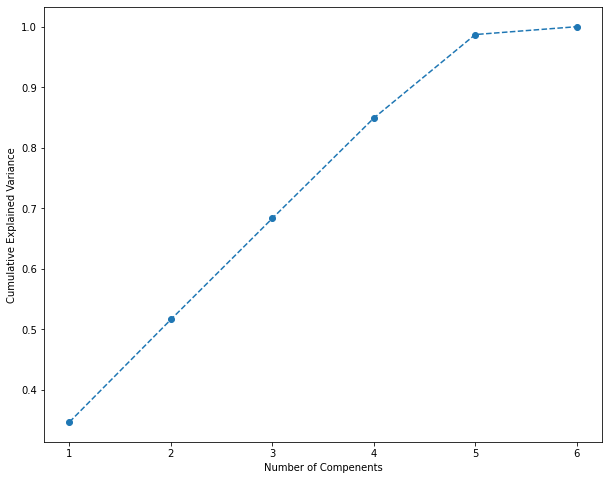

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(range(1,7),pca_bbis.explained_variance_ratio_.cumsum(),marker ="o",linestyle ="--")
plt.xlabel("Number of Compenents")
plt.ylabel("Cumulative Explained Variance")

In [ ]:
pca_bbis =PCA(n_components=4) #number of PCA compenent = 4 because we must preserve %80 of variance
pca_bbis.fit(dataBirBakistaIhaleSelected_std)

PCA(copy=True, iterated_power='auto', n_components=4, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
scores_pca_bbis = pca_bbis.transform(dataBirBakistaIhaleSelected_std)

In [ ]:
wcss_bbis=[]
for i in range(1,25):
  kmeans_pca_bbis = KMeans(n_clusters=i, init ='k-means++', max_iter=300, n_init=10,random_state=42)
  kmeans_pca_bbis.fit(scores_pca_bbis)
  wcss_bbis.append(kmeans_pca_bbis.inertia_)

Text(0, 0.5, 'WCSS')

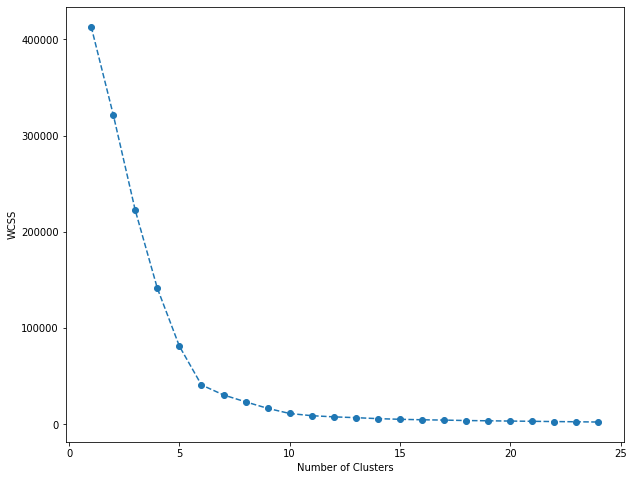

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(range(1,25),wcss_bbis,marker ="o",linestyle ="--")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS") #number of cluster = 5

In [ ]:
kmeans_pca_bbis = KMeans(n_clusters=6, init ='k-means++', max_iter=300, n_init=10,random_state=42)

In [ ]:
kmeans_pca_bbis.fit(scores_pca_bbis)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [ ]:
df_segm_pcakmeans_bbis = pd.concat([dataBirBakistaIhaleSelected.reset_index(drop=True),pd.DataFrame(scores_pca_bbis)],axis = 1)
df_segm_pcakmeans_bbis.columns.values[-4:] = ["component1","component2","component3","component4"]
df_segm_pcakmeans_bbis["label_KMeans_PCA"] = kmeans_pca_bbis.labels_

In [ ]:
df_segm_pcakmeans_bbis

,cs-method,sc-bytes,cs-bytes,time-taken,cs-username,sc-statusBinary,component1,component2,component3,component4,label_KMeans_PCA
0,1,9788,1443,122,0,1,0.100661,-1.888470,-0.092770,0.892141,3
1,1,9656,862,152,1,1,-0.324213,0.362967,-0.052212,-0.311915,0
2,1,9508,1443,107,0,1,0.087786,-1.894896,-0.098223,0.892055,3
3,1,10115,1033,97,1,1,-0.228012,0.364187,-0.074547,-0.331839,0
4,1,9544,862,156,1,1,-0.329417,0.361890,-0.050500,-0.309307,0
...,...,...,...,...,...,...,...,...,...,...,...
81111,1,9678,1426,131,0,1,0.088100,-1.889026,-0.089085,0.895947,3
81112,1,9615,767,176,1,1,-0.367721,0.364510,-0.042650,-0.305543,0
81113,1,8206,1032,489,1,1,-0.318889,0.394160,0.080697,-0.201807,0
81114,1,9744,1220,70,1,1,-0.163380,0.357417,-0.084864,-0.332775,0


In [ ]:
bbis_labelledDataKmeans = pd.concat([dataBirBakistaIhaleSelected.reset_index(drop=True),pd.DataFrame(kmeans_pca_bbis.labels_)],axis = 1)
bbis_labelledDataKmeans.columns.values[-1:] = ["label_KMeans_PCA"]

In [ ]:
bbis_labelledDataKmeans[bbis_labelledDataKmeans['label_KMeans_PCA'] == 5] 

,cs-method,sc-bytes,cs-bytes,time-taken,cs-username,sc-statusBinary,label_KMeans_PCA
10248,0,0,1129,126265,1,1,5
15330,1,0,1186,81552,0,1,5
24972,1,0,942,130722,1,1,5
24973,1,8230,942,85578,1,1,5
30959,1,8406,1186,93237,0,1,5
33894,0,1448,3623,150790,0,1,5
33895,0,1448,3623,148276,0,1,5
33896,0,1448,3623,150314,0,1,5
33897,0,1448,3623,151676,0,1,5
35167,1,0,963,275307,1,1,5


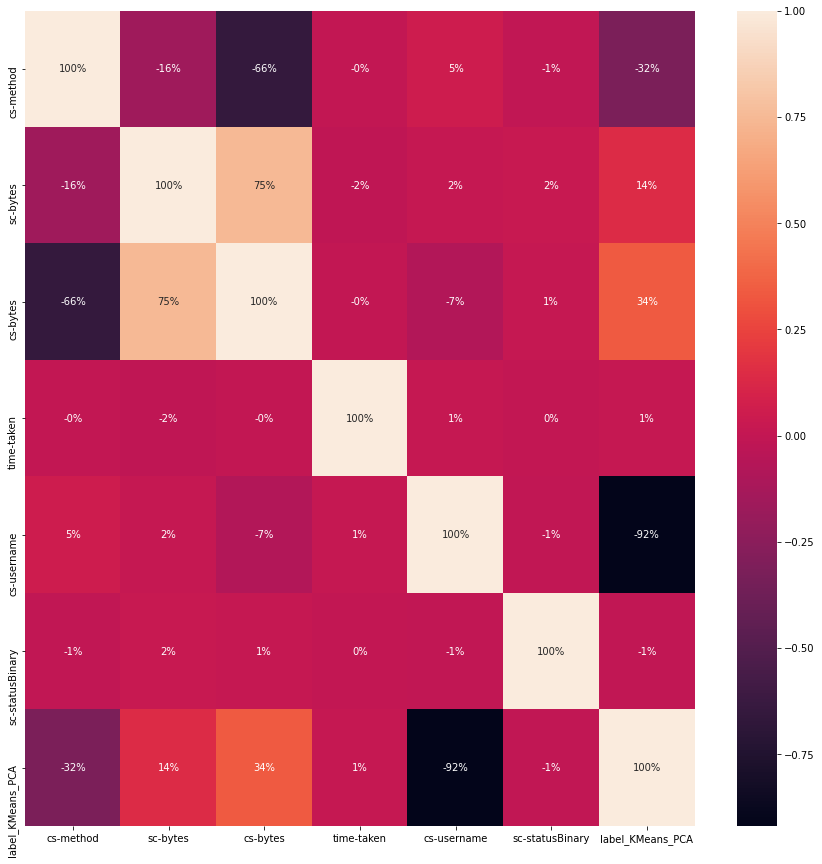

In [ ]:
plt.figure(figsize=(15,15))
corr= bbis_labelledDataKmeans.iloc[:,:].corr()
sns.heatmap(corr,annot=True,fmt='.0%')

In [ ]:
bbis_labelledDataKmeans['label_KMeans_PCA'].value_counts()

0    63991
3    12524
2     4316
4      215
1       58
5       12
Name: label_KMeans_PCA, dtype: int64

In [ ]:
bbis_labelledDataKmeans[bbis_labelledDataKmeans['label_KMeans_PCA']==0]

,cs-method,sc-bytes,cs-bytes,time-taken,cs-username,sc-statusBinary,label_KMeans_PCA
1,1,9656,862,152,1,1,0
3,1,10115,1033,97,1,1,0
4,1,9544,862,156,1,1,0
5,1,8159,1113,62,1,1,0
6,1,9870,862,186,1,1,0
...,...,...,...,...,...,...,...
81110,1,7910,1032,486,1,1,0
81112,1,9615,767,176,1,1,0
81113,1,8206,1032,489,1,1,0
81114,1,9744,1220,70,1,1,0


In [ ]:
bbis_labelledDataKmeans[bbis_labelledDataKmeans['label_KMeans_PCA']==1] #only sc-statusBinary == 0

In [ ]:
bbis_labelledDataKmeans[bbis_labelledDataKmeans['label_KMeans_PCA']==2]

,cs-method,sc-bytes,cs-bytes,time-taken,cs-username,sc-statusBinary,label_KMeans_PCA
72,0,2411,3204,46,1,1,2
319,0,4006,4220,86,1,1,2
348,0,4005,4196,86,1,1,2
370,0,4060,4251,86,1,1,2
379,0,4066,4438,87,1,1,2
...,...,...,...,...,...,...,...
79692,1,69577,1414,186,0,1,2
79991,0,2443,3334,45,1,1,2
80393,1,69837,1414,193,0,1,2
81018,1,69577,1414,230,0,1,2


In [ ]:
bbis_labelledDataKmeans[bbis_labelledDataKmeans['label_KMeans_PCA']==3]

,cs-method,sc-bytes,cs-bytes,time-taken,cs-username,sc-statusBinary,label_KMeans_PCA
0,1,9788,1443,122,0,1,3
2,1,9508,1443,107,0,1,3
8,1,8280,1377,94,0,1,3
17,1,10981,1411,150,0,1,3
21,1,8338,1378,103,0,1,3
...,...,...,...,...,...,...,...
80830,1,9704,1358,97,0,1,3
80880,1,8377,1411,114,0,1,3
81034,1,9461,1442,95,0,1,3
81109,1,10319,1426,147,0,1,3


In [ ]:
bbis_labelledDataKmeans[bbis_labelledDataKmeans['label_KMeans_PCA']==4]

,cs-method,sc-bytes,cs-bytes,time-taken,cs-username,sc-statusBinary,label_KMeans_PCA
11199,0,228380,29649,220,1,1,4
18390,0,19483,27137,440,0,1,4
19854,0,145561,16047,145,1,1,4
19864,0,145561,16047,171,1,1,4
19876,0,145561,16047,129,1,1,4
...,...,...,...,...,...,...,...
46523,0,228380,29653,94,1,1,4
46533,0,228380,29653,153,1,1,4
46539,0,228380,29653,220,1,1,4
46546,0,228380,29653,133,1,1,4


In [ ]:
bbis_labelledDataKmeans[bbis_labelledDataKmeans['label_KMeans_PCA']==5]

,cs-method,sc-bytes,cs-bytes,time-taken,cs-username,sc-statusBinary,label_KMeans_PCA
10248,0,0,1129,126265,1,1,5
15330,1,0,1186,81552,0,1,5
24972,1,0,942,130722,1,1,5
24973,1,8230,942,85578,1,1,5
30959,1,8406,1186,93237,0,1,5
33894,0,1448,3623,150790,0,1,5
33895,0,1448,3623,148276,0,1,5
33896,0,1448,3623,150314,0,1,5
33897,0,1448,3623,151676,0,1,5
35167,1,0,963,275307,1,1,5


**cs-username&cs-method problem**

In [ ]:
dataBirBakistaIhaleSelected_4C = dataBirBakistaIhaleSelected.drop(columns=['cs-method','cs-username'])

In [ ]:
scaler = StandardScaler()#Scaling
dataBirBakistaIhaleSelected_4C_std = scaler.fit_transform(dataBirBakistaIhaleSelected_4C)
dataBirBakistaIhaleSelected_4C_std

array([[ 0.0265737 ,  0.09722988, -0.10492471,  0.02674952],
       [ 0.01529251, -0.27701481, -0.09006566,  0.02674952],
       [ 0.0026439 ,  0.09722988, -0.11235424,  0.02674952],
       ...,
       [-0.10862966, -0.1675112 ,  0.07685108,  0.02674952],
       [ 0.0228133 , -0.04641309, -0.13068041,  0.02674952],
       [-0.11589406, -0.1675112 ,  0.12093295,  0.02674952]])

In [ ]:
pca_bbis_4C = PCA()
pca_bbis_4C.fit(dataBirBakistaIhaleSelected_4C_std)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
pca_bbis_4C.explained_variance_ratio_

array([0.43762162, 0.25058399, 0.24920163, 0.06259276])

Text(0, 0.5, 'Cumulative Explained Variance')

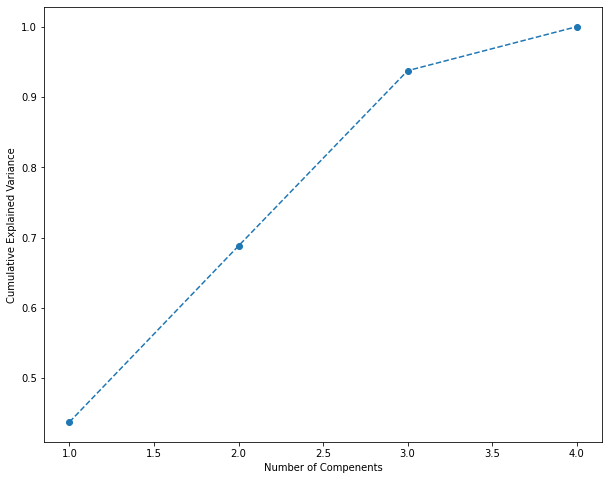

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(range(1,5),pca_bbis_4C.explained_variance_ratio_.cumsum(),marker ="o",linestyle ="--")
plt.xlabel("Number of Compenents")
plt.ylabel("Cumulative Explained Variance")

In [ ]:
pca_bbis_4C =PCA(n_components=3) 
pca_bbis_4C.fit(dataBirBakistaIhaleSelected_4C_std)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

Text(0, 0.5, 'WCSS')

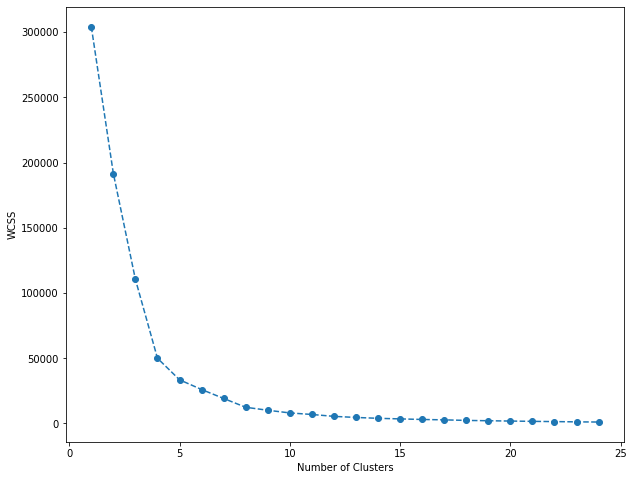

In [ ]:
scores_pca_bbis_4C = pca_bbis_4C.transform(dataBirBakistaIhaleSelected_4C_std)
wcss_bbis_4C=[]
for i in range(1,25):
  kmeans_pca_bbis_4C = KMeans(n_clusters=i, init ='k-means++', max_iter=300, n_init=10,random_state=42)
  kmeans_pca_bbis_4C.fit(scores_pca_bbis_4C)
  wcss_bbis_4C.append(kmeans_pca_bbis_4C.inertia_)

plt.figure(figsize=(10,8))
plt.plot(range(1,25),wcss_bbis_4C,marker ="o",linestyle ="--")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS") #number of cluster = 4

In [ ]:
kmeans_pca_bbis_4C = KMeans(n_clusters=4, init ='k-means++', max_iter=300, n_init=10,random_state=42)
kmeans_pca_bbis_4C.fit(scores_pca_bbis_4C)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [ ]:
df_segm_pcakmeans_bbis_4C = pd.concat([dataBirBakistaIhaleSelected_4C.reset_index(drop=True),pd.DataFrame(scores_pca_bbis_4C)],axis = 1)
df_segm_pcakmeans_bbis_4C.columns.values[-3:] = ["component1","component2","component3"]
df_segm_pcakmeans_bbis_4C["label_KMeans_PCA"] = kmeans_pca_bbis_4C.labels_

In [ ]:
df_segm_pcakmeans_bbis_4C["label_KMeans_PCA"].value_counts()

0    80822
1      224
3       58
2       12
Name: label_KMeans_PCA, dtype: int64

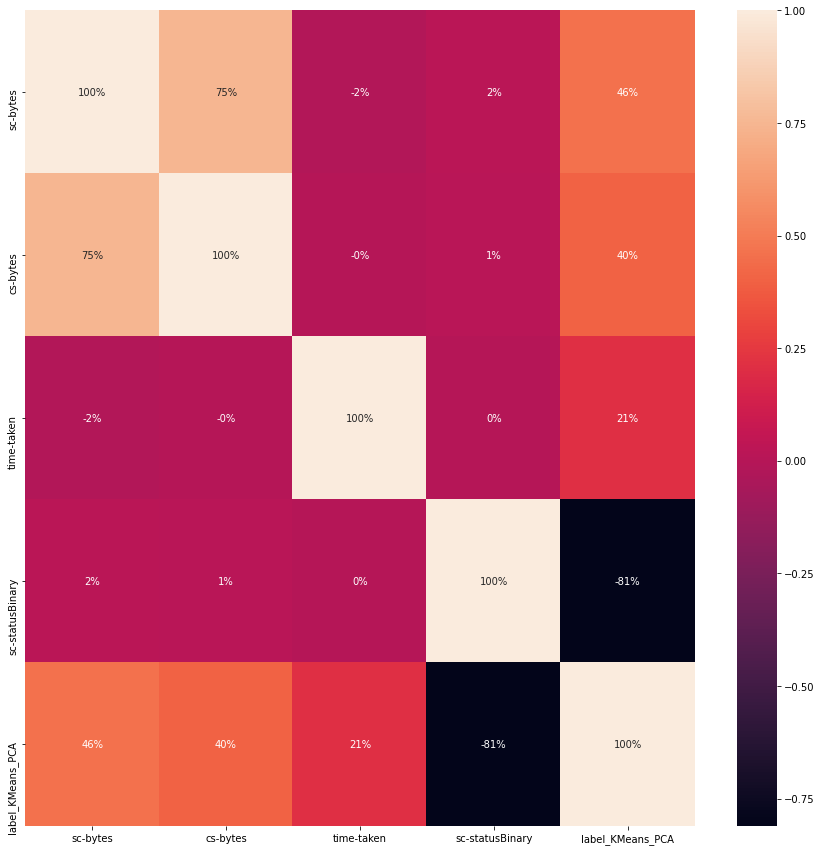

In [ ]:
bbis_4C_labelledDataKmeans = pd.concat([dataBirBakistaIhaleSelected_4C.reset_index(drop=True),pd.DataFrame(kmeans_pca_bbis_4C.labels_)],axis = 1)
bbis_4C_labelledDataKmeans.columns.values[-1:] = ["label_KMeans_PCA"]
plt.figure(figsize=(15,15))
corr= bbis_4C_labelledDataKmeans.iloc[:,:].corr()
sns.heatmap(corr,annot=True,fmt='.0%')

In [ ]:
bbis_4C_labelledDataKmeans[bbis_4C_labelledDataKmeans['label_KMeans_PCA'] == 3] #sc-statusBinary ==0

In [ ]:
bbis_4C_labelledDataKmeans[bbis_4C_labelledDataKmeans['label_KMeans_PCA'] == 2]

,sc-bytes,cs-bytes,time-taken,sc-statusBinary,label_KMeans_PCA
10248,0,1129,126265,1,2
15330,0,1186,81552,1,2
24972,0,942,130722,1,2
24973,8230,942,85578,1,2
30959,8406,1186,93237,1,2
33894,1448,3623,150790,1,2
33895,1448,3623,148276,1,2
33896,1448,3623,150314,1,2
33897,1448,3623,151676,1,2
35167,0,963,275307,1,2


In [ ]:
bbis_4C_labelledDataKmeans[bbis_4C_labelledDataKmeans['label_KMeans_PCA'] == 1]

,sc-bytes,cs-bytes,time-taken,sc-statusBinary,label_KMeans_PCA
11194,249529,340,1523,1,1
11199,228380,29649,220,1,1
18390,19483,27137,440,1,1
19854,145561,16047,145,1,1
19864,145561,16047,171,1,1
...,...,...,...,...,...
46523,228380,29653,94,1,1
46533,228380,29653,153,1,1
46539,228380,29653,220,1,1
46546,228380,29653,133,1,1


In [ ]:
bbis_4C_labelledDataKmeans[bbis_4C_labelledDataKmeans['label_KMeans_PCA'] == 0]

,sc-bytes,cs-bytes,time-taken,sc-statusBinary,label_KMeans_PCA
0,9788,1443,122,1,0
1,9656,862,152,1,0
2,9508,1443,107,1,0
3,10115,1033,97,1,0
4,9544,862,156,1,0
...,...,...,...,...,...
81111,9678,1426,131,1,0
81112,9615,767,176,1,0
81113,8206,1032,489,1,0
81114,9744,1220,70,1,0


In [ ]:
bbis_4C_labelledDataKmeans["sc-statusBinary"].value_counts()

1    81058
0       58
Name: sc-statusBinary, dtype: int64

# **PCA and K-Means For Default.aspx**

In [ ]:
scaler = StandardScaler()#Scaling
dataDefaultSelected_std = scaler.fit_transform(dataDefaultSelected)

In [ ]:
dataDefaultSelected_std

array([[ 0.58025835,  0.03485973, -0.2274532 , -0.07451991, -1.15427325,
         0.63160508],
       [ 0.58025835,  0.4582307 , -0.33867653, -0.10427847,  0.86634599,
         0.63160508],
       [ 0.58025835, -0.02663679, -0.31872245, -0.10282683,  0.86634599,
         0.63160508],
       ...,
       [ 0.58025835,  0.46743629, -0.33867653, -0.08758464,  0.86634599,
         0.63160508],
       [ 0.58025835,  0.46743629, -0.33832232, -0.10427847,  0.86634599,
         0.63160508],
       [ 0.58025835,  0.46743629, -0.33867653, -0.10464138,  0.86634599,
         0.63160508]])

In [ ]:
pca_default = PCA()
pca_default.fit(dataDefaultSelected_std)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
pca_default.explained_variance_ratio_

array([0.36274078, 0.21535475, 0.16440679, 0.15698483, 0.07335998,
       0.02715287])

Text(0, 0.5, 'Cumulative Explained Variance')

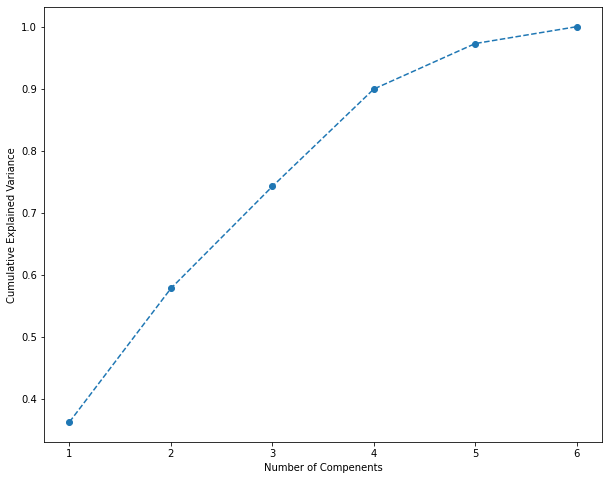

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(range(1,7),pca_default.explained_variance_ratio_.cumsum(),marker ="o",linestyle ="--")
plt.xlabel("Number of Compenents")
plt.ylabel("Cumulative Explained Variance")

In [ ]:
pca_default =PCA(n_components=4) 
pca_default.fit(dataDefaultSelected_std)

PCA(copy=True, iterated_power='auto', n_components=4, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
scores_pca_default = pca_default.transform(dataDefaultSelected_std)

In [ ]:
wcss_default=[]
for i in range(1,25):
  kmeans_pca_default = KMeans(n_clusters=i, init ='k-means++', max_iter=300, n_init=10,random_state=42)
  kmeans_pca_default.fit(scores_pca_default)
  wcss_default.append(kmeans_pca_default.inertia_)

Text(0, 0.5, 'WCSS')

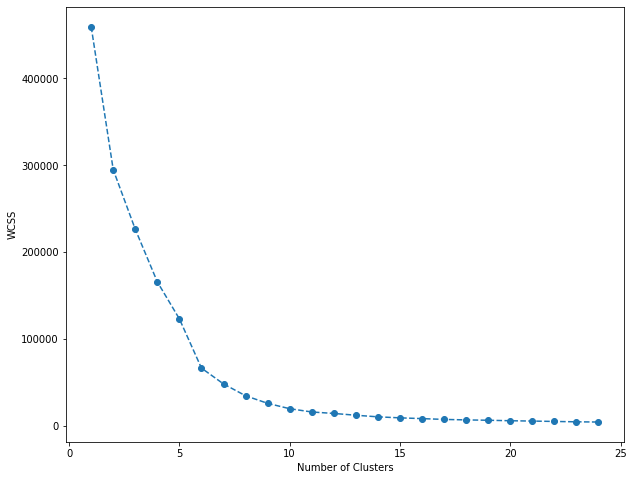

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(range(1,25),wcss_default,marker ="o",linestyle ="--")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS") #number of cluster = 5

In [ ]:
kmeans_pca_default = KMeans(n_clusters=6, init ='k-means++', max_iter=300, n_init=10,random_state=42)

In [ ]:
kmeans_pca_default.fit(scores_pca_default)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [ ]:
df_segm_pcakmeans_default = pd.concat([dataDefaultSelected.reset_index(drop=True),pd.DataFrame(scores_pca_default)],axis = 1)

In [ ]:
df_segm_pcakmeans_default.columns.values[-4:] = ["component1","component2","component3","component4"]

In [ ]:
df_segm_pcakmeans_default["label_KMeans_PCA"] = kmeans_pca_default.labels_

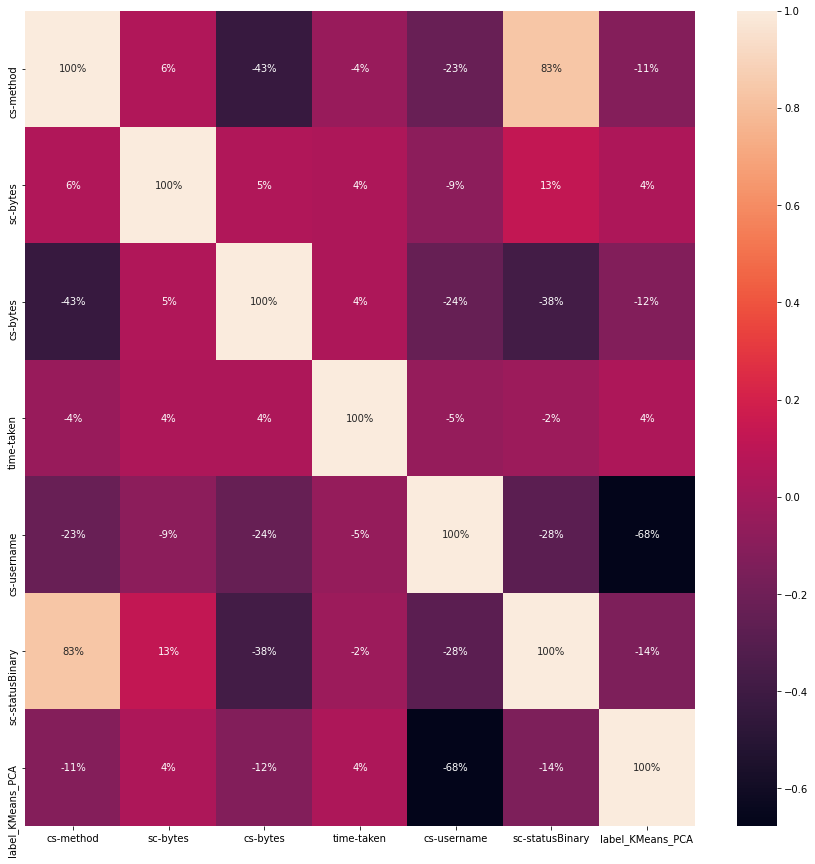

In [ ]:
default_labelledDataKmeans = pd.concat([dataDefaultSelected.reset_index(drop=True),pd.DataFrame(kmeans_pca_default.labels_)],axis = 1)
default_labelledDataKmeans.columns.values[-1:] = ["label_KMeans_PCA"]
plt.figure(figsize=(15,15))
corr= default_labelledDataKmeans.iloc[:,:].corr()
sns.heatmap(corr,annot=True,fmt='.0%')

In [ ]:
default_labelledDataKmeans['label_KMeans_PCA'].value_counts()

4    31405
0    28119
3    21409
1     4064
2       63
5       45
Name: label_KMeans_PCA, dtype: int64

In [ ]:
default_labelledDataKmeans[default_labelledDataKmeans['sc-statusBinary']==0]['label_KMeans_PCA'].value_counts()

3    20119
1     3955
4      182
2       13
Name: label_KMeans_PCA, dtype: int64

**cs-method&cs-username problem**

In [ ]:
dataDefaultSelected_4C = dataDefaultSelected.drop(columns=['cs-method','cs-username'])
scaler = StandardScaler()#Scaling
dataDefaultSelected_4C_std = scaler.fit_transform(dataDefaultSelected_4C)
dataDefaultSelected_4C_std

array([[ 0.03485973, -0.2274532 , -0.07451991,  0.63160508],
       [ 0.4582307 , -0.33867653, -0.10427847,  0.63160508],
       [-0.02663679, -0.31872245, -0.10282683,  0.63160508],
       ...,
       [ 0.46743629, -0.33867653, -0.08758464,  0.63160508],
       [ 0.46743629, -0.33832232, -0.10427847,  0.63160508],
       [ 0.46743629, -0.33867653, -0.10464138,  0.63160508]])

In [ ]:
dataDefaultSelected_4C

,sc-bytes,cs-bytes,time-taken,sc-statusBinary
0,35920,1085,111,1
1,99801,143,29,1
2,26641,312,33,1
3,99801,146,27,1
4,35596,1116,209,1
...,...,...,...,...
85100,26759,626,33,1
85101,26735,434,33,1
85102,101190,143,75,1
85103,101190,146,29,1


In [ ]:
pca_default_4C = PCA()
pca_default_4C.fit(dataDefaultSelected_4C_std)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
pca_default_4C.explained_variance_ratio_

array([0.34678151, 0.26613093, 0.24082499, 0.14626256])

Text(0, 0.5, 'Cumulative Explained Variance')

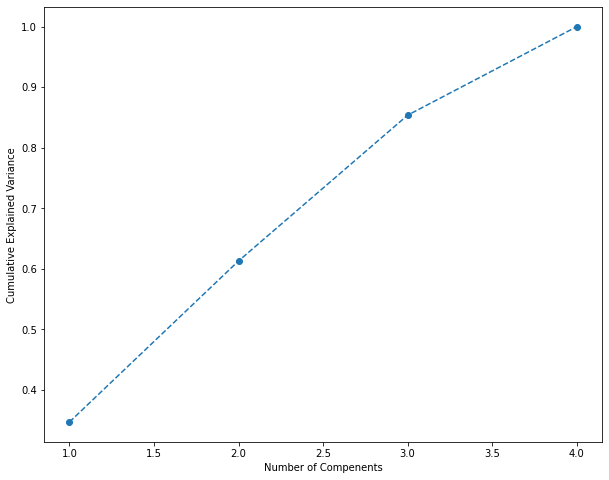

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(range(1,5),pca_default_4C.explained_variance_ratio_.cumsum(),marker ="o",linestyle ="--")
plt.xlabel("Number of Compenents")
plt.ylabel("Cumulative Explained Variance")

In [ ]:
pca_default_4C =PCA(n_components=3) 
pca_default_4C.fit(dataDefaultSelected_4C_std)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

Text(0, 0.5, 'WCSS')

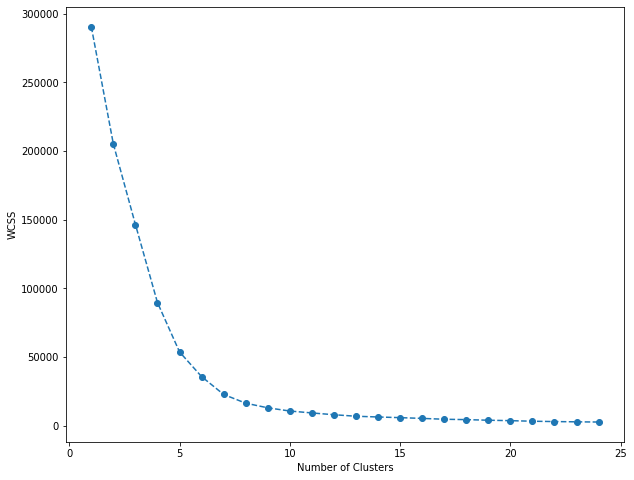

In [ ]:
scores_pca_default_4C= pca_default_4C.transform(dataDefaultSelected_4C_std)

wcss_default_4C=[]
for i in range(1,25):
  kmeans_pca_default_4C = KMeans(n_clusters=i, init ='k-means++', max_iter=300, n_init=10,random_state=42)
  kmeans_pca_default_4C.fit(scores_pca_default_4C)
  wcss_default_4C.append(kmeans_pca_default_4C.inertia_)


plt.figure(figsize=(10,8))
plt.plot(range(1,25),wcss_default_4C,marker ="o",linestyle ="--")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS") #number of cluster = 4

In [ ]:
kmeans_pca_default_4C = KMeans(n_clusters=5, init ='k-means++', max_iter=300, n_init=10,random_state=42)

In [ ]:
kmeans_pca_default_4C.fit(scores_pca_default_4C)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [ ]:
df_segm_pcakmeans_default_4C = pd.concat([dataDefaultSelected_4C.reset_index(drop=True),pd.DataFrame(scores_pca_default_4C)],axis = 1)
df_segm_pcakmeans_default_4C.columns.values[-3:] = ["component1","component2","component3"]
df_segm_pcakmeans_default_4C["label_KMeans_PCA"] = kmeans_pca_default_4C.labels_

In [ ]:
df_segm_pcakmeans_default_4C

,sc-bytes,cs-bytes,time-taken,sc-statusBinary,component1,component2,component3,label_KMeans_PCA
0,35920,1085,111,1,-0.616850,0.026973,-0.033743,1
1,99801,143,29,1,-0.748539,0.321652,-0.254959,1
2,26641,312,33,1,-0.674588,-0.055911,-0.003667,1
3,99801,146,27,1,-0.748371,0.321314,-0.255635,1
4,35596,1116,209,1,-0.610410,0.046077,-0.004318,1
...,...,...,...,...,...,...,...,...
85100,26759,626,33,1,-0.649319,-0.047813,-0.012594,1
85101,26735,434,33,1,-0.664810,-0.052513,-0.007303,1
85102,101190,143,75,1,-0.747958,0.338328,-0.246117,1
85103,101190,146,29,1,-0.749438,0.328984,-0.259876,1


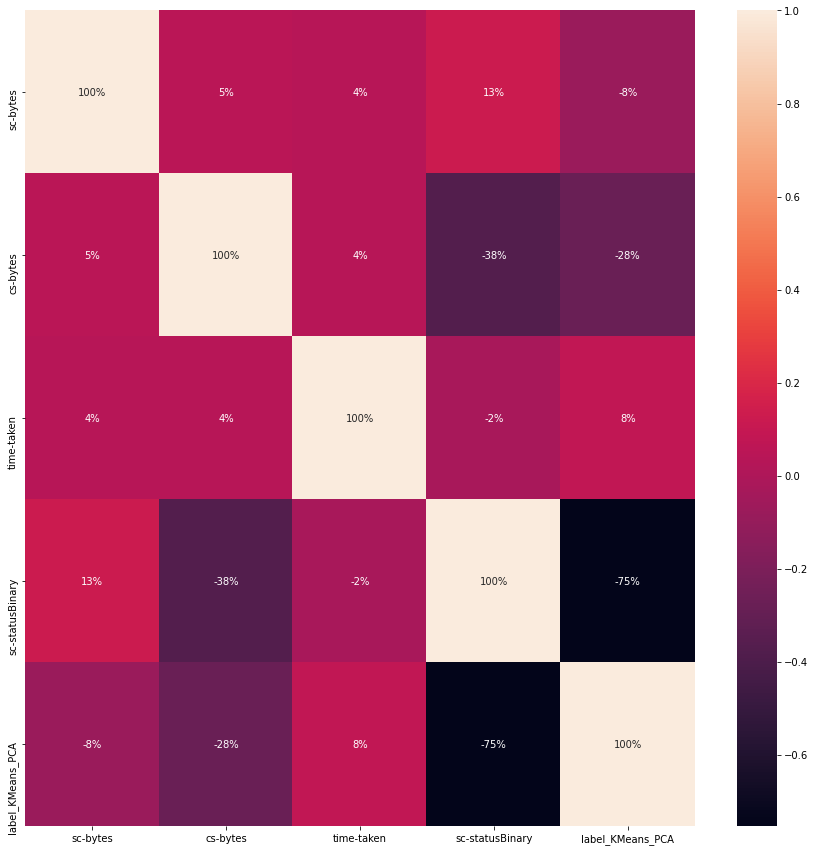

In [ ]:
default_4C_labelledDataKmeans = pd.concat([dataDefaultSelected_4C.reset_index(drop=True),pd.DataFrame(kmeans_pca_default_4C.labels_)],axis = 1)
default_4C_labelledDataKmeans.columns.values[-1:] = ["label_KMeans_PCA"]
plt.figure(figsize=(15,15))
corr= default_4C_labelledDataKmeans.iloc[:,:].corr()
sns.heatmap(corr,annot=True,fmt='.0%')

In [ ]:
default_4C_labelledDataKmeans[default_4C_labelledDataKmeans["sc-statusBinary"]==0]['label_KMeans_PCA'].value_counts()

3    20333
0     3923
4       13
Name: label_KMeans_PCA, dtype: int64